<a href="https://colab.research.google.com/github/jessicasilvacodes/pln-pucminas/blob/main/pln_03_data_augmentation_pucminas_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aquisição de dados com enriquecimento de dados** - Data Augmentation

Data Augmentation, ou Enriquecimento de Dados, é uma técnica utilizada para aumentar artificialmente o conjunto de dados de treinamento em aprendizado de máquina, especialmente quando se lida com conjuntos de dados pequenos ou desbalanceados. Em vez de coletar mais dados, o aumento de dados envolve a criação de novas amostras a partir dos dados existentes, através de transformações como rotações, cortes, mudanças de cor, substituição de sinônimos, inserção de palavras, tradução reversa, remoção de palavras, etc.

Motivação:
- conjuntos de dados limitados
- melhoria da generalização do modelo
- balanceamento de dados
- robustez a ruídos e erros
- adaptação a diferentes dialetos
- teste e avaliação de modelos

**NLPaug** é a biblioteca Python usada para aumentar dados de texto.

In [23]:
# Instala pacotes para enriquecimento e análise de dados.
!pip install matplotlib
!pip install nlpaug
!pip install numpy
!pip install pandas
!pip install requests
!pip install scikit-learn
!pip install seaborn
!pip install tqdm

In [24]:
# Declara define funções utilitárias utilizadas no notebook.
import datetime
def formata_msg(nivel, msg, componente=None):
    """
    Formata uma mensagem de log incluindo o nível de severidade, timestamp,
    componente (opcional) e a mensagem.

    Parâmetros:
    - nivel (str): Nível de severidade da mensagem (ex: 'INFO', 'ERROR', 'WARNING').
    - msg (str): A mensagem de log propriamente dita.
    - componente (str, opcional): O componente ou módulo do sistema que gera a mensagem.

    Retorna:
    - str: A mensagem de log formatada.
    """
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    if componente:
        return f"[{nivel}] {timestamp} - {componente}: {msg}"
    else:
        return f"[{nivel}] {timestamp} - {msg}"

def plotar_distribuicao_polaridade(df):
    """
    Função para plotar um gráfico de barras da contagem de valores para a coluna 'polarity'.

    Parâmetros:
    df (DataFrame): O DataFrame contendo a coluna 'polarity' a ser analisada.

    Esta função utiliza a biblioteca seaborn para criar um gráfico de barras que
    mostra a contagem de ocorrências para cada valor único na coluna 'polarity'.
    Os rótulos dos eixos são removidos para uma apresentação mais limpa, e as bordas
    esquerdas são também removidas.
    """

    # Realiza a contagem de valores na coluna 'polarity' e armazena o resultado
    polarity_counts = df['polarity'].value_counts()

    # Cria o gráfico de barras usando seaborn, definindo os valores do eixo x e y
    sns.barplot(x=polarity_counts.index, y=polarity_counts, hue=polarity_counts.index, legend=False)

    # Configurações para remover rótulos e títulos desnecessários do gráfico
    plt.yticks([], [])  # Remove os rótulos do eixo y para simplificar a visualização
    plt.xlabel('')      # Limpa o título do eixo x para uma apresentação mais limpa
    plt.ylabel('')      # Limpa o título do eixo y para uma apresentação mais limpa
    sns.despine(left=True)  # Remove a borda esquerda do gráfico para um design mais minimalista

    # Loop para adicionar rótulos de texto em cada barra do gráfico, melhorando a interpretabilidade
    for container in plt.gca().containers:
        plt.gca().bar_label(container)  # Adiciona rótulos nas barras com a contagem de cada 'polarity'

print(formata_msg("INFO", f"Funções utilitárias foram declaradas, prontas para utilização."))

[INFO] 2025-07-30 19:34:46 - Funções utilitárias foram declaradas, prontas para utilização.


In [25]:
# Importação da biblioteca padrão
import os

# Importação de bibliotecas de terceiros
import matplotlib.pyplot as plt
import nlpaug.augmenter.word as naw
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm

print(formata_msg("INFO", "Bibliotecas importadas com sucesso; ambiente pronto."))

[INFO] 2025-07-30 19:34:46 - Bibliotecas importadas com sucesso; ambiente pronto.


In [26]:
# Define o diretório local para armazenar as bases de dados públicas coletadas.
corpora_caminho = "./corpora"

# Verifica se o diretório especificado já existe no ambiente do Colab.
if not os.path.exists(corpora_caminho):
  # Caso o diretório não exista, cria um novo diretório com o nome 'corpora'.
  # Isso é útil para organizar os arquivos de dados baixados ou gerados.
  os.mkdir(corpora_caminho)

print(formata_msg("INFO", f"Diretório {corpora_caminho} foi criado com sucesso."))

[INFO] 2025-07-30 19:34:46 - Diretório ./corpora foi criado com sucesso.


## Base de dados de comentários do Buscapé
Buscapé é uma plataforma de comércio eletrônico brasileiro. O Buscapé funciona como um assistente de compras, para que os consumidores pesquisem produtos, preços, promoções e lojas.O Buscapé pertence à Mosaico Tecnologia ao Consumidor, que também é dona de outras plataformas de e-commerce.

In [27]:
# Define a URL da base pública armazenada no Github.
url = "https://raw.githubusercontent.com/gomesluiz/product-review-analytics/main/data/raw/buscape.csv"

# Configuração do arquivo para armazenamento da base de dados.
buscape_arquivo = "buscape-comentarios.csv"

# O método os.path.join cria o caminho completo para o arquivo, combinando
# 'corpora_caminho' com o nome do arquivo.
buscape_caminho = os.path.join(corpora_caminho, buscape_arquivo)

# Define o formato do arquivo. Necessário para arquivos textos
# armazenados no raw.githubusercontent.com.
parametros = {"downloadformat": "csv"}

# Executa o download do arquivo especificado na URL com os parâmetros
# especificados
resposta = requests.get(url, params=parametros)
if resposta.status_code == 200:
  # Se o status for igual a 200 (sucesso), grava o arquivo no caminho
  # especificado
  with open(buscape_caminho, "wb") as f:
    f.write(resposta.content)
  print(formata_msg("INFO",f"Download do arquivo {buscape_arquivo} concluído com sucesso!"))
else:
  print(f"Falha no download do arquivo {buscape_arquivo}:", resposta.status_code)


[INFO] 2025-07-30 19:34:47 - Download do arquivo buscape-comentarios.csv concluído com sucesso!


In [28]:
# O comando head do linux mostra as cinco primeiras linhas do arquivo gravado.
!head -n 30 {buscape_caminho}

original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
4_55516,"Estou muito satisfeito, o visor é melhor do que eu imaginava, boas imagens, desing ultra fino. Pelo preço é um exelente aparelho.

O que gostei: Desing exelente, display, custo beneficio.

O que não gostei: Não tem como adicionar mais papeis de parede, bateria dura pouco.","estou muito satisfeito, o visor e melhor do que eu imaginava, boas imagens, desing ultra fino. pelo preco e um exelente aparelho.

o que gostei: desing exelente, display, custo beneficio.

o que nao gostei: nao tem como adicionar mais papeis de parede, bateria dura pouco.","['estou', 'muito', 'satisfeito', 'visor', 'melhor', 'do', 'que', 'eu', 'imaginava', 'boas', 'imagens', 'desing', 'ultra', 'fino', 'pelo', 'preco', 'um', 'exelente', 'aparelho', 'que', 'gostei', 'desing', 'exelente', 'display', 'custo', 'beneficio', 'que', 'nao', 'gostei', 'nao', 'tem', 'como', 'adicionar', 'mais', 'papeis', 

In [29]:
# Lista das colunas específicas para serem lidas do arquivo CSV.
colunas_desejadas = ['review_text', 'polarity']

# Carrega dados do CSV usando as colunas definidas.
buscape_df = pd.read_csv(buscape_caminho, usecols=colunas_desejadas)

# Mostra o número de linhas e colunas do dataFrame buscape_df.
num_rows, num_cols = buscape_df.shape[0], buscape_df.shape[1]
print(formata_msg("INFO", f"O dataset tem {num_rows} linnhas e {num_cols} colunas."))

[INFO] 2025-07-30 19:34:49 - O dataset tem 84991 linnhas e 2 colunas.


In [30]:
# Remove todas as linhas do DataFrame que contêm valores nulos.
buscape_df.dropna(inplace=True)

# Mostra o número de linhas e colunas do dataFrame buscape_df.
num_rows, num_cols = buscape_df.shape[0], buscape_df.shape[1]
print(formata_msg("INFO", f"O dataset tem {num_rows} linnhas e {num_cols} colunas."))

[INFO] 2025-07-30 19:34:49 - O dataset tem 73626 linnhas e 2 colunas.


In [31]:
# Exibe as primeiras 5 linhas do DataFrame 'buscape_df' para uma rápida inspeção.
buscape_df.head(10)

,review_text,polarity
0,"Estou muito satisfeito, o visor é melhor do qu...",1.0
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0
2,"Rápida, ótima qualidade de impressão e fácil d...",1.0
3,Produto de ótima qualidade em todos os quesito!,1.0
4,Precisava comprar uma tv compatível com meu dv...,1.0
5,"eu adorei este secador é muito bom,potente e d...",1.0
7,positiva\n\nO que gostei: cumpriu com as espec...,1.0
8,"Muito satisfeita com o telefone, atendeu as mi...",1.0
9,Estou muito contente com a utlização da maquin...,1.0
10,Excelente produto. Estou satisfeita com o resu...,1.0


Garantindo que a polaridade seja um número inteiro:

In [32]:
# Converte os valores da coluna 'polarity' para string.
buscape_df['polarity'] = buscape_df['polarity'].astype(int)

# Exibe as primeiras 5 linhas do DataFrame 'buscape_df' para uma rápida inspeção.
buscape_df.head(10)

,review_text,polarity
0,"Estou muito satisfeito, o visor é melhor do qu...",1
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1
2,"Rápida, ótima qualidade de impressão e fácil d...",1
3,Produto de ótima qualidade em todos os quesito!,1
4,Precisava comprar uma tv compatível com meu dv...,1
5,"eu adorei este secador é muito bom,potente e d...",1
7,positiva\n\nO que gostei: cumpriu com as espec...,1
8,"Muito satisfeita com o telefone, atendeu as mi...",1
9,Estou muito contente com a utlização da maquin...,1
10,Excelente produto. Estou satisfeita com o resu...,1


Quantidade de registros por polaridade:

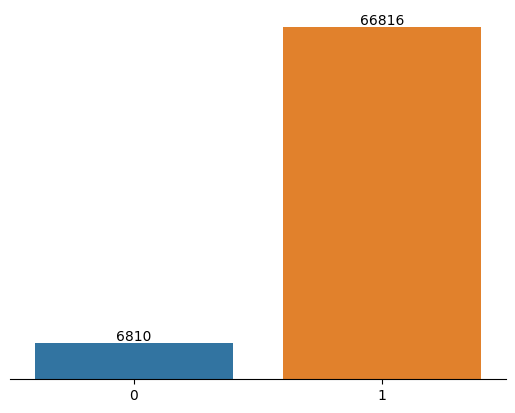

In [33]:
# Plota um gráfico de barras as categorias de polaridade.
plotar_distribuicao_polaridade(buscape_df)

Exemplo:

In [34]:
# Seleciona uma linha específica do dataFrame 'buscape_df' usando 'iloc' para
# testes do enriquecimento de dados.
texto = buscape_df.iloc[5]['review_text'].replace("\n", " ")
print(texto)

eu adorei este secador é muito bom,potente e deixa meu cabelo lindo


### Teste de enriquecimento de dados:

In [35]:
# Inicializando o augmentador com o modelo BERT em português
# para inserir palavras contextualmente apropriadas
enriquecedor = naw.ContextualWordEmbsAug(
    model_path='neuralmind/bert-base-portuguese-cased', action="insert")

# Exibindo o texto original
print("Texto original:")
print(texto)

# Exibindo o texto enriquecido
print("Texto enriquecido:")
for ii in range(5):
    print(enriquecedor.augment(texto))


Texto original:
eu adorei este secador é muito bom,potente e deixa meu cabelo lindo
Texto enriquecido:


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


['eu gente adorei muito este óleo secador é muito bom, potente e ele deixa todo meu cabelo tudo lindo']
['Ola eu adorei tanto este secador [UNK] é muito e bom, são potente e deixa [UNK] meu cabelo lindo']
['eu adorei este secador que é algo muito bom, uso potente e ele deixa meu mini cabelo bem lindo']
['eu sempre adorei mesmo este secador porque é muito bom, Ultra potente e deixa mega meu o cabelo lindo']
['eu me adorei tudo este secador dele é muito bom, potente demais e deixa meu primeiro cabelo dela lindo']


Divisão do conjunto de dados em treinamento (80%) e teste (20%):

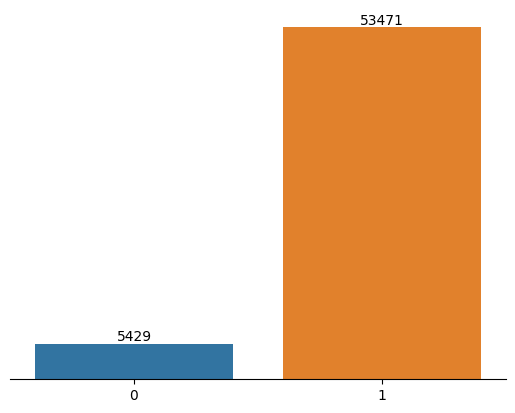

In [36]:
# Divisão do DataFrame 'buscape_df' em conjuntos de treino e teste.
train, test = train_test_split(buscape_df, test_size=0.20, random_state=42)

# plotar a distribuição de polaridade no conjunto de treino
plotar_distribuicao_polaridade(train)

**Não podemos fazer o enriquecimento no conjunto de testes!!!**

### Enriquecimento de dados:

In [37]:
def enriquecer_texto(enriquecedor, df, classe, amostras=100, prob_aug=0.2):
    """
    Enriquece textos de uma determinada classe em um DataFrame usando enriquecimento.

    A função seleciona aleatoriamente um conjunto de textos da classe especificada
    e aplica a augmentação para gerar novos textos. Esses textos são adicionados ao
    DataFrame original, criando uma versão enriquecida do mesmo.

    Args:
        enriquecedor: Objeto utilizado para realizar a augmentação dos textos.
        df (pd.DataFrame): DataFrame contendo os textos e suas respectivas classes.
        classe (int/str): A classe dos textos que serão enriquecidos.
        amostras (int, optional): Número de textos da classe especificada a serem enriquecidos.
            Padrão é 100.
        prob_aug (float, optional): Probabilidade de cada palavra ser augmentada.
            Padrão é 0.2.

    Returns:
        pd.DataFrame: DataFrame original com os textos enriquecidos adicionados,
        embaralhado de forma aleatória.
    """

    # Define a probabilidade de augmentação para o enriquecedor
    enriquecedor.aug_p = prob_aug

    # Inicializa a lista para armazenar textos enriquecidos
    textos_enriquecidos = []

    # Filtra o DataFrame para obter apenas as entradas da classe especificada
    df_minoritario = df[df.polarity == classe].reset_index(drop=True)

    # Loop para enriquecer uma quantidade específica de amostras aleatórias
    for i in tqdm(np.random.randint(0, len(df_minoritario), amostras)):
        texto = df_minoritario.iloc[i]['review_text']
        texto_enriquecido = enriquecedor.augment(texto)
        textos_enriquecidos.append(texto_enriquecido)

    # Cria um DataFrame com os textos enriquecidos e a classe-alvo
    df_enriquecido = pd.DataFrame({'review_text': textos_enriquecidos, 'polarity': classe})

    # Combina o DataFrame original com o DataFrame enriquecido e embaralha
    df_resultante = pd.concat([df, df_enriquecido], ignore_index=True).sample(frac=1, random_state=42)

    # Retorna o DataFrame resultante
    return df_resultante

print(formata_msg("INFO", f"Função de enriquecimento pronta para utilização."))


[INFO] 2025-07-30 19:35:00 - Função de enriquecimento pronta para utilização.


In [38]:
# Enriquece o conjunto de treinamento. Esse procedimento não
# ser aplicado somente no conjunto de testes. Esse
# deve refletir dados do mundo real tão fielmente quanto possível.
train_enrequecido = enriquecer_texto(enriquecedor, train, 0, amostras=10)
print(formata_msg("INFO", f"Dataset de treinamento enriquecido."))

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
100%|██████████| 10/10 [01:11<00:00,  7.20s/it]

[INFO] 2025-07-30 19:36:12 - Dataset de treinamento enriquecido.


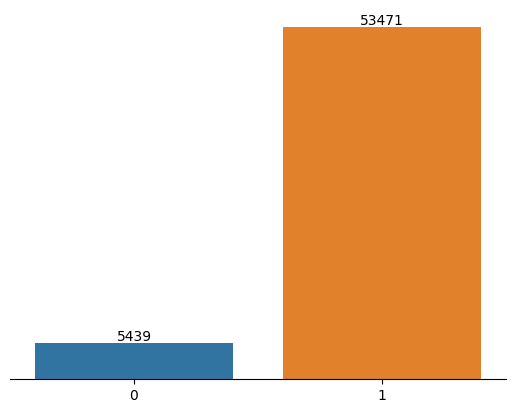

In [39]:
# plotar a distribuição de polaridade no conjunto de treino
# após o enriquecimento.
plotar_distribuicao_polaridade(train_enrequecido)